# **Machine learning aplicado al diagnóstico y clasificación de la malaria mediante redes neuronales convolucionales.**
------------------------------------------------------------------------------
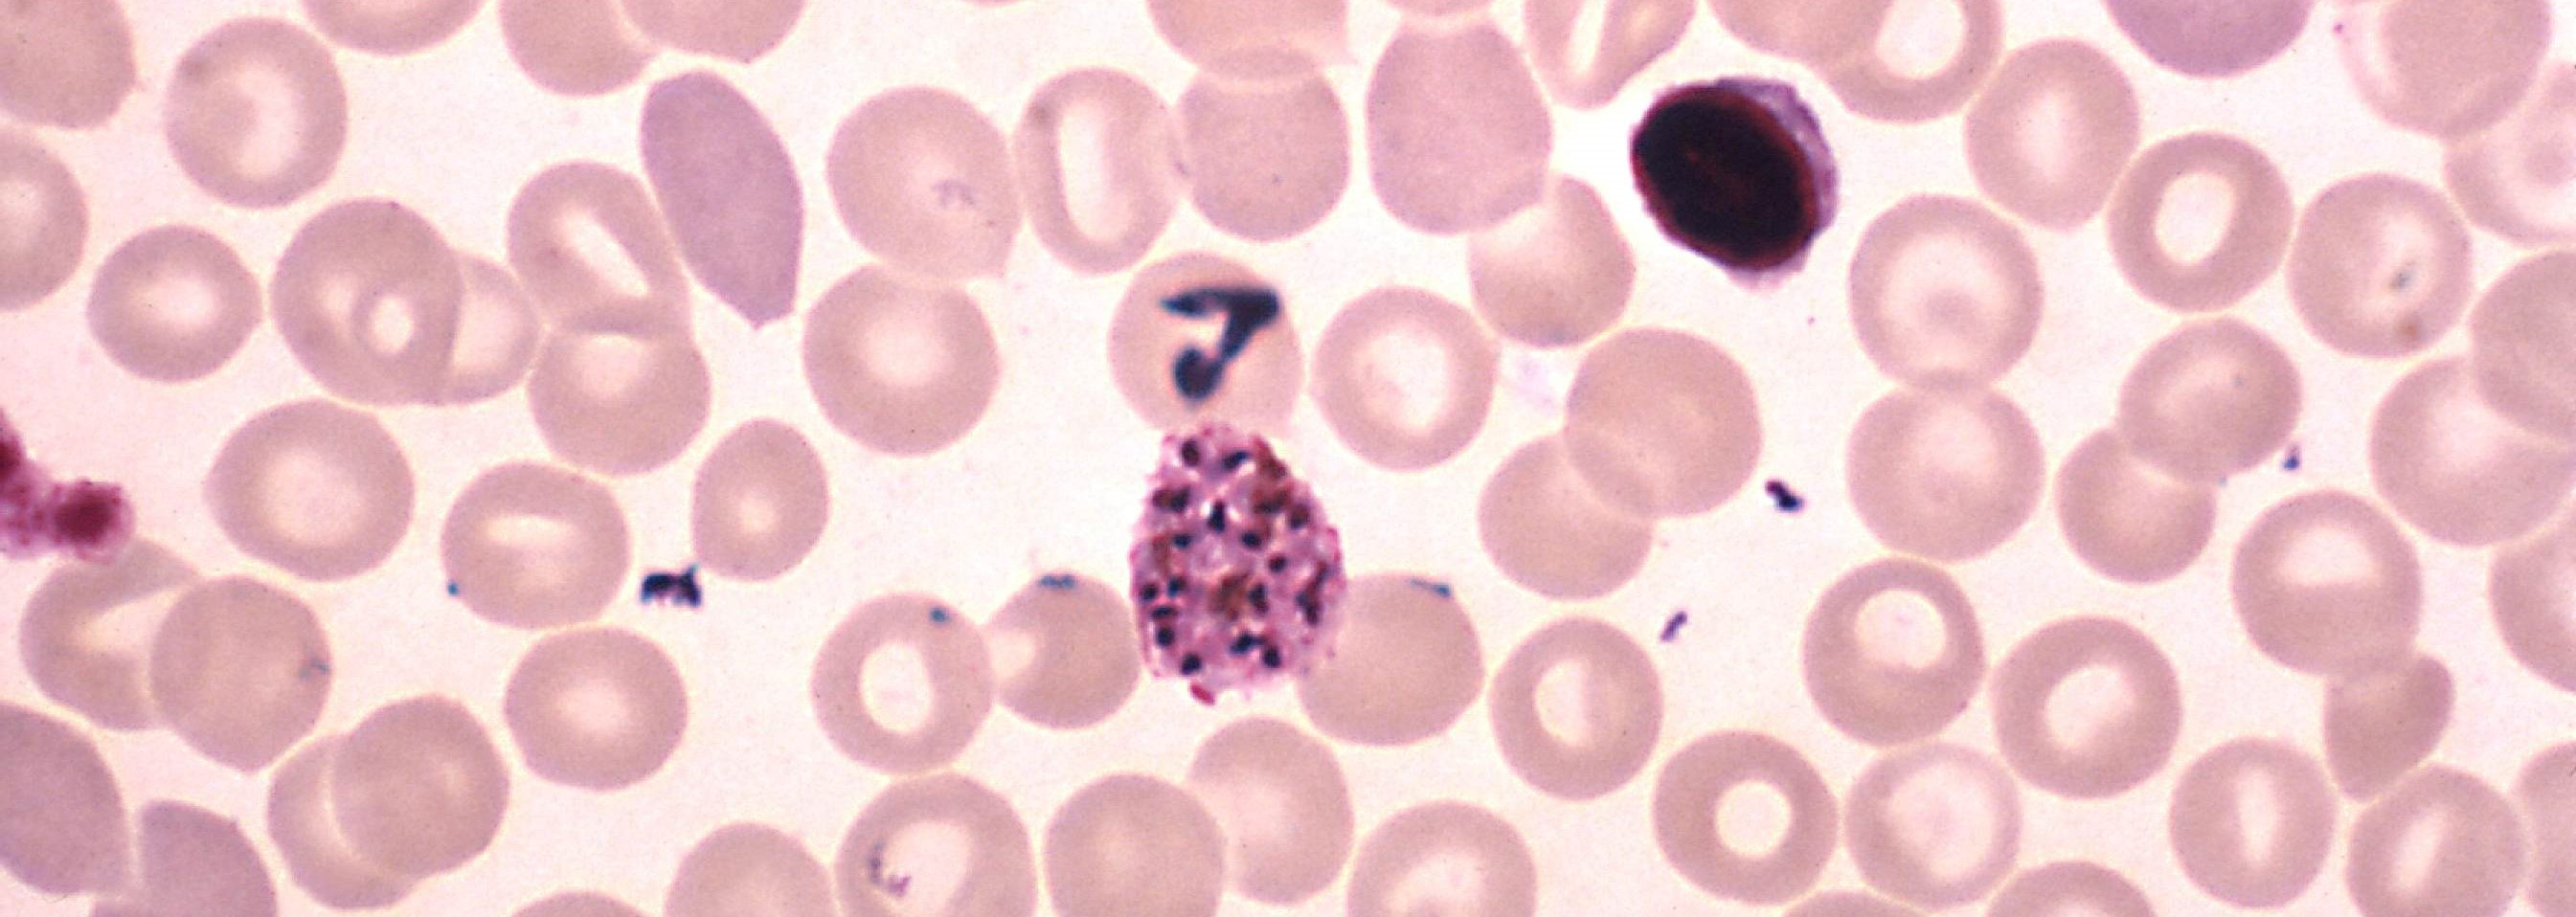

> **Acerca del proyecto**

*   **Autor:** Gorka Varona Garrido

*   **Tipo de proyecto:** Machine Learning + Redes Neuronales Convolucionales
*   **Bibliotecas utilizadas:**

    *   Numpy
    *   Pandas
    *   Matplotlib
    *   Scikit-learn
    *   FastAI


*   **Set de datos:** Malaria Cell Image Dataset

*   **Fuente:** Mi github
*   **Origen:** https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets
*   **Última actualización:** 24/05/2021


> **Descripción**

La malaria es una enfermedad infecciosa y potencialmente mortal que afecta a millones de personas cada año, siendo uno de los factores principales, la carencia de recursos económicos y sanitarios que sufren los países menos desarrollados.  

El método de transmisión más común de esta afección, se da mediante la picadura de mosquitos hembra del género Anopheles, la cual infecta al huésped, transmitiendo parásitos que viajan por el torrente sanguíneo, pudiendo causar desde fiebre, dolor de cabeza o escalofríos hasta  insuficiencia renal, sangrado interno o finalmente, la muerte.

A día de hoy, la malaria se detecta mediante un examen de sangre, en el que  un microscopista experto observará las células del posible infectado en busca del parásito, pero dada la falta de recursos anteriormente comentados en varias zonas de África, el subcontinente asíatico o Nueva Guinea, República Dominicana y Haití, la realización de este examen médico es costoso, y en muchas ocasiones no puede llevarse a cabo.   

Con el paso de los años, organizaciones de todo el mundo se han propuesto erradicar esta enfermedad apoyándose en tecnologías punteras como la Inteligencia Artificial o el Big Data. Gracias a este hecho, existen numerosos conjuntos de datos en internet, acerca de pacientes infectados y no infectados por malaria que pueden ser utilizados para investigación. 

En vista que el principal problema que sufren los países más castigados por la enfermedad, pasa en gran parte por la falta de microscopistas expertos en la fase de detección, se considera un modelo de machine learning  una alternativa a modo de detectar la infección, dotando a un modelo de imágenes de células de pacientes infectados y no infectados y entrenando al mismo mediante redes neuronales convolucionales en busca de patrones que den como resultado un diagnóstico fiable. 

Para lograr esto, el modelo primero deberá pasar por un proceso de entrenamiento de aprendizaje supervisado, dónde irá aprendiendo de las miles de imágenes con las que se cuentan, para que este después sea capaz de hacer sus propias predicciones.

De este modo, en zonas donde los recursos sean más limitados, podrían usar esta alternativa sin necesidad de contar con un microscopista experto, reduciendo así los tiempos del diagnóstico y mejorando sus redes sanitarias.








________________________________________________________________________________

Preparando el entorno de ejecución e instalando bibliotecas necesarias.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install fastai==2.0.19 fastcore==1.0.0

     |████████████████████████████████| 194kB 28.3MB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
     |████████████████████████████████| 5.9MB 16.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: fastai 2.0.19 has requirement fastcore<1.4,>=1.3, but you'll have fastcore 1.0.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
pip install git+https://github.com/fastai/fastai2

  Cloning https://github.com/fastai/fastai2 to /tmp/pip-req-build-q1nzoxyc
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-q1nzoxyc
  Running command git submodule update --init --recursive -q
  Created wheel for fastai2: filename=fastai2-0.0.30-cp37-none-any.whl size=177979 sha256=75e045b6999cb6ae2cd234d85d5ac651ac709bd5689a9fd99213dd2608e7f82b
  Stored in directory: /tmp/pip-ephem-wheel-cache-adz_4e_1/wheels/a1/59/9a/50335b36924b827e29d5f40b41fc3a008cc1f30dd80e560dfd
Successfully built fastai2


### **Paso 1. Importando las bibliotecas**

Se importan todas las librerias necesarias para la ejecución del código.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai2.data.all import *
from fastai2.vision.data import *
from fastai2.vision.all import *
from sklearn.metrics import auc, roc_curve, precision_recall_curve, classification_report

### **Paso 2. Obteniendo el conjunto de datos**

Obtenemos el conjunto de datos y lo preparamos para poder trabajar con el.

In [ ]:
!git clone https://github.com/gorkavarona/Malaria-Cassification-With-CNN.git

Cloning into 'Malaria-Cassification-With-CNN'...
remote: Enumerating objects: 27578, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 27578 (delta 0), reused 4 (delta 0), pack-reused 27574
Receiving objects: 100% (27578/27578), 332.34 MiB | 41.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (27561/27561), done.


In [ ]:
print(os.listdir("Malaria-Cassification-With-CNN/dataset"))

['Uninfected', 'Parasitized']


In [ ]:
path = Path('Malaria-Cassification-With-CNN/dataset/') 

### **Paso *3*. Preparando las imágenes**

Preparamos las variables que vamos a aplicar a las imágenes que después se pasarán al modelo.

1.   Dividimos los datos al azar con la función *RandomSplitter()*
2.   Aplicamos un cambio de tamaño (redimensionamiento) a cada elemento con *Resize* (224 tamaño común)
3.   Utilizamos *aug_transform* para la transformación de imágenes (voltearlas, zoom máximo y deformación máxima). Pasándole esto a *batch_tfms* hay que tener en  cuenta que las transformaciones sucederán en la GPU (si está disponible).



In [ ]:
splitter = RandomSplitter()
item_tfms = [Resize(224)]
batch_tfms=[*aug_transforms(flip_vert=True,max_zoom=1.2, max_warp=0), Normalize.from_stats(*imagenet_stats)]

Creamos el bloque de datos, convirtiendo nuestros tipos en bloques (uno para imágenes y otro para categorias).  La función realiza la búsqueda de subcarpetas para todos los nombres de archivos de imágenes *get_image_files*. La division de entrenamiento y validación será realizada por la función *RandomSplitter()* y la función para obtener nuestros objetivos (a menudo llamados y) es parent_label.

In [ ]:
data_block = DataBlock(blocks=[ImageBlock, CategoryBlock],
                  get_items=get_image_files,
                  get_y=parent_label,
                  splitter=splitter,
                  item_tfms=item_tfms,
                  batch_tfms=batch_tfms)

### **Paso 4. Alimentando el bloque de datos**

En sí mismo, el bloque de datos es solo un plano. No está haciendo nada (no busca errores). Para ello debemos alimentarlo con la fuente de los datos para recopilar algo utilizando *.dataloaders()* . Le pasaremos la ruta con las carpetas de 'Parasitized' y 'Uninfected' y bs=64 (tamaño de lote predeterminado, pero se podría aumentar o disminuir en función de la GPU). Después lo mostramos con *show_batch()*.



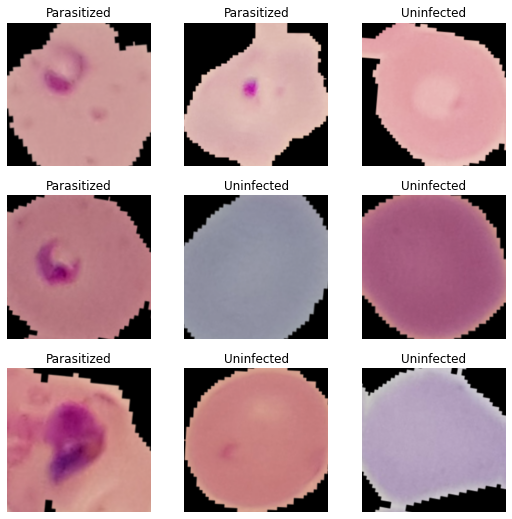

In [ ]:
data = data_block.dataloaders(path, bs=64)
data.show_batch()

### **Paso *5*. Entrenando el modelo con CNN**

Entrenaremos nuestro modelo a través de las redes neuronales convolucionales con *cnn_learner()*. 

#### **Paso 5.1. Probando el modelo XResNet34**
Resnet34 es uno de esos modelos entrenados en el conjunto de datos ImageNet que contiene alrededor de 1.3 millones de imágenes y se puede clasificar en miles de categorías de imágenes. En nuestro problema, solo tenemos 2 categorías (infectado o no infectado), por lo que usamos las capas iniciales que son útiles para reconocer patrones básicos como líneas, esquinas, formas simples y luego volver a entrenar en las capas finales.

Con la métrica mediremos la calidad de las predicciones del modelo. Se utilizará la métrica 'accuracy' ya que esta mide el porcentaje de casos que el modelo ha acertado.

In [ ]:
learn = cnn_learner(data, xresnet34, metrics=[accuracy])

Usamos la función *fine_tune()* ya que realiza la tarea de ajustar el modelo previamente entrenado para resolver nuestro problema específico utilizando los datos que hemos seleccionado.

In [ ]:
learn.fine_tune(3)

KeyboardInterrupt: ignored

Guardamos el modelo ya entrenado y ajustado en la carpeta creeada por defecto.

In [ ]:
learn.save('stage-1')

Importamos el modelo previamente entrenado. 

**¡Advertencia!**

Si ya tenemos un modelo previamente entrenado en nuestro equipo o unidad de memoria, tendremos que seguir los siguientes pasos para importarlo de manera correcta:

1.   Ejecutar la línea de código -- *learn = cnn_learner(data, xresnet34, metrics= [accuracy])* -- 
2.   Crear una carpeta llamada "models" en la ruta montada en el paso 1 ("/content/gdrive")
3.   Subimos el modelo a la carpeta que acabamos de crear
4.   Ejecutamos la línea de código de aqui abajo.

Si acabamos de crear el modelo por primera vez continuar con el Paso 6 directamente.

In [ ]:
trainedModel = learn.load('stage-1')

### **Paso 6. Creando la matriz de confusión**

Utilizaremos la función *ClassificationInterpretation* para interpretar mejor las predicciones del modelo. Después dibujamos el cuadro de matriz de confusión.

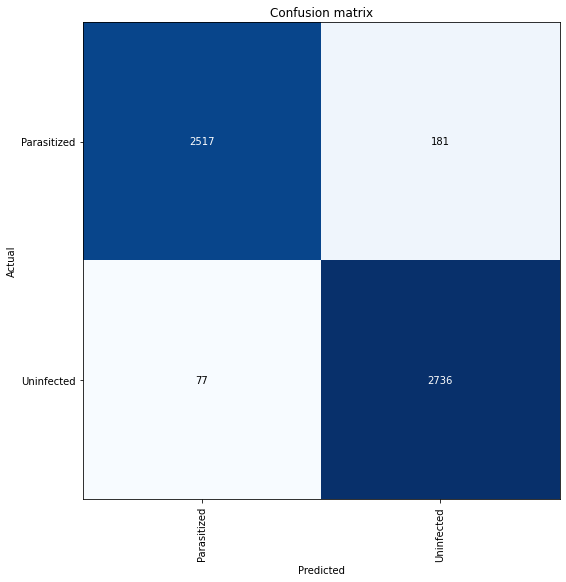

In [ ]:
interp = ClassificationInterpretation.from_learner(trainedModel)
interp.plot_confusion_matrix(figsize=(10,8))

Obtenemos las predicciones y utilizamos el *.shape* para generar representaciones gráficas de cambios de forma, basadas en criterios de predicción.

In [ ]:
preds, y_true=learn.get_preds()
y_true.shape, preds.shape

(torch.Size([5511]), torch.Size([5511, 2]))

In [ ]:
y_true=y_true.numpy() 
preds=np.argmax(preds.numpy(), axis=-1)
y_true.shape, preds.shape

((5511,), (5511,))

### **Paso 7. Creando un informe de métricas**

Creamos un informe de texto que muestre las principales métricas de clasificación.

In [ ]:
classes = list(data.vocab)
report = classification_report(y_true, preds, target_names=classes)
print(report)

              precision    recall  f1-score   support

 Parasitized       0.97      0.93      0.95      2698
  Uninfected       0.94      0.97      0.95      2813

    accuracy                           0.95      5511
   macro avg       0.95      0.95      0.95      5511
weighted avg       0.95      0.95      0.95      5511



### **Paso 8. Mostrando resultados**

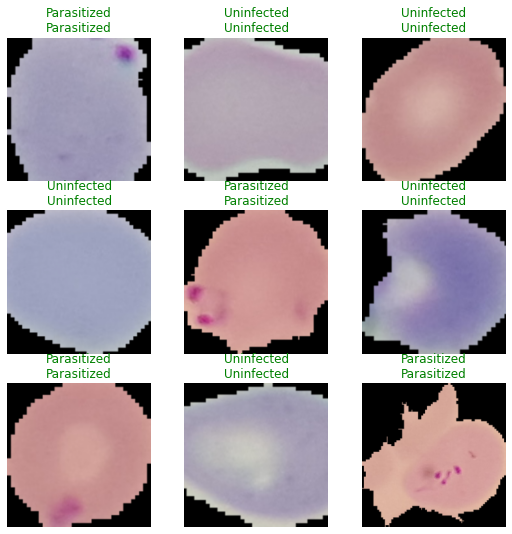

In [ ]:
learn.show_results()